# Sort by Frequency

## Author: Timothy Proffitt

## CS 2500 (Algorithms) @ Missouri S&T

## Prerequisite Packages

We will use the numpy and matplotlib library in this notebook

In [1]:
# Install all the prerequisite packages from the Terminal
!pip install numpy
!pip install matplotlib

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

# Sort by Frequency

Sort by frequency uses a dictionary to track the amount of times each element appears, than uses those values to copy the elements to a new array sorted in decreasing appearance.

In [3]:
def FrequencySort(A):
  freq_dict = {}
  sorted_keys ={}
  returnlist = []
  for i in A:
    if i not in freq_dict:
      freq_dict[i] = 1
    else:
      freq_dict[i]+= 1

  sorted_keys = sorted(freq_dict.items(), key = lambda x:x[1], reverse = True)

  for i in sorted_keys:
    while freq_dict[i[0]] > 0:
      returnlist.append(i[0])
      freq_dict[i[0]] -= 1
      
  return returnlist

# Test 

We're testing for correctness using a test input.

In [4]:
list = [3,5,2,1,0,1,2,3,4,2,0,3,4,2,1]
print(f'Unsorted: {list}')
print(f'Sorted: {FrequencySort(list)}')

Unsorted: [3, 5, 2, 1, 0, 1, 2, 3, 4, 2, 0, 3, 4, 2, 1]
Sorted: [2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 0, 0, 4, 4, 5]


# Plotting Run-Time Complexity

In [5]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [7]:
 # Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        FrequencySort(array)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

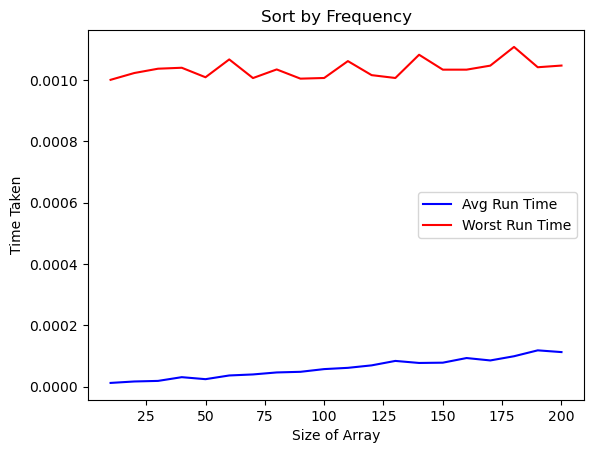

In [9]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Sort by Frequency") 

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()